In [46]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [47]:
# create simple control setup
# New Antecedent/Consequent objects hold universe variables and membership
# functions
# th1 = ctrl.Antecedent(np.arange(0, 180, 1), 'th1')
# th2 = ctrl.Antecedent(np.arange(-90, 90, 1), 'th2')
acc_range = np.arange(-10, 10, 1)
a_x = ctrl.Antecedent(acc_range, 'a_x')
a_y = ctrl.Antecedent(acc_range, 'a_y')
servo = ctrl.Consequent(np.arange(0, 180, 1), 'servo')

# Auto-membership function population is possible with .automf(3, 5, or 7)
# a_x.automf(3)
# a_y.automf(3)
a_x['stable'] = fuzz.trimf(acc_range, [-2, 0, 2])
a_x['n_waver'] = fuzz.trimf(acc_range, [-8, -6, -2])
a_x['n_unstable'] = fuzz.trimf(acc_range, [-10, -10, -8])
a_x['p_waver'] = fuzz.trimf(acc_range, [2, 6, 8])
a_x['p_unstable'] = fuzz.trimf(acc_range, [8, 10, 10])

a_y['stable'] = fuzz.trimf(acc_range, [-2, 0, 2])
a_y['n_waver'] = fuzz.trimf(acc_range, [-8, -6, -2])
a_y['n_unstable'] = fuzz.trimf(acc_range, [-10, -10, -8])
a_y['p_waver'] = fuzz.trimf(acc_range, [2, 6, 8])
a_y['p_unstable'] = fuzz.trimf(acc_range, [8, 10, 10])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
servo['vert'] = fuzz.trimf(servo.universe, [60, 90, 120])
servo['slant'] = fuzz.trimf(servo.universe, [30, 45, 60])
servo['horizontal'] = fuzz.trimf(servo.universe, [0, 15, 30])

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

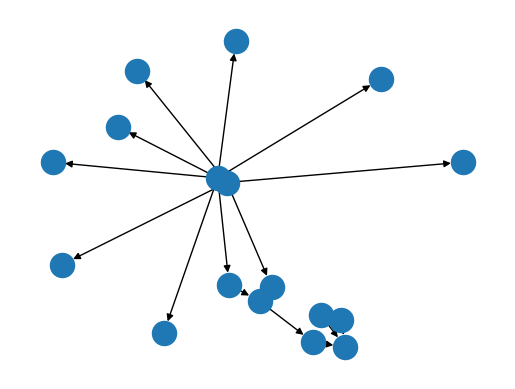

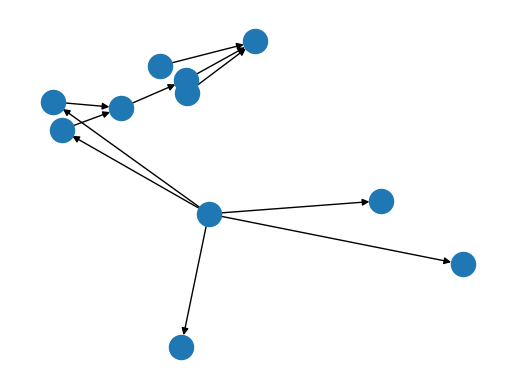

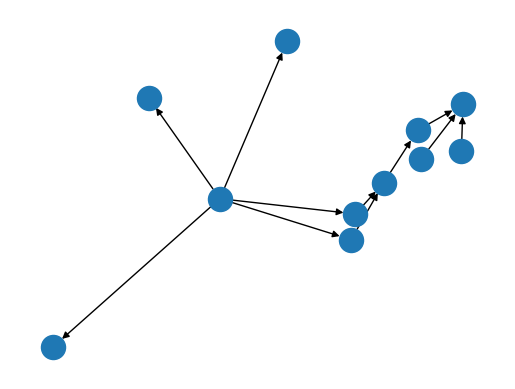

In [48]:
# creating rules...
rule1 = ctrl.Rule(a_x['stable'] & a_y['stable'], servo['vert'])
rule2 = ctrl.Rule(a_x['n_unstable'] | a_x['p_unstable'], servo['vert'])
rule3 = ctrl.Rule(a_y['n_unstable'] | a_y['p_unstable'], servo['horizontal'])
rule4 = ctrl.Rule(a_x['n_waver'] | a_x['p_waver'], servo['slant'])
rule5 = ctrl.Rule(a_y['n_waver'] | a_y['p_waver'], servo['slant'])


# rule2 = ctrl.Rule(a_x['average'] & a_y['average'], servo['medium'])
# rule3 = ctrl.Rule(a_x['poor'] & a_y['good'], servo['high'])

# displaying rule views
rule1.view()
rule2.view()
rule3.view()

In [49]:
servo_ctrl_rules = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
servo_ctrl = ctrl.ControlSystemSimulation(servo_ctrl_rules)

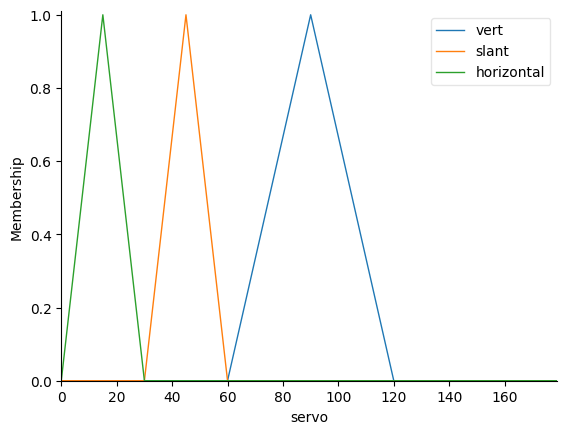

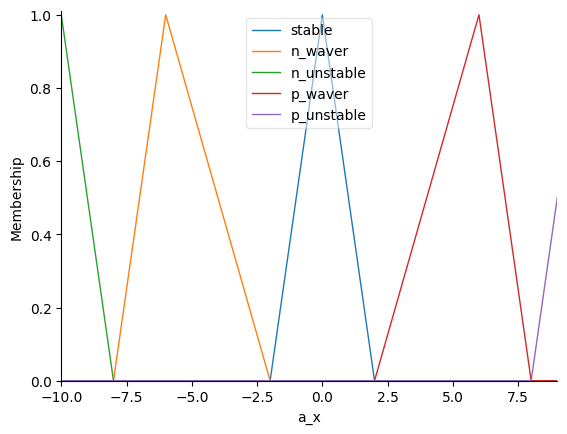

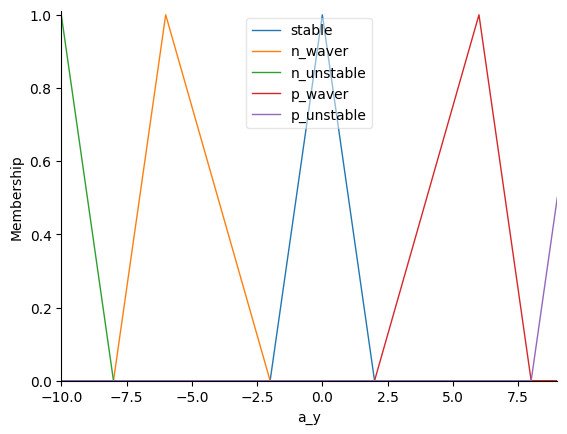

In [50]:
# servo_ctrl.view()
servo.view()
a_x.view()
a_y.view()

In [57]:
servo_ctrl.input['a_x'] = 1
servo_ctrl.input['a_y'] = 2

# Crunch the numbers
servo_ctrl.compute()

print(servo_ctrl.output['servo'])
servo.view(sim=servo_ctrl)

ValueError: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.